- In this project, **we aim to find the two best markets to advertise our product in** — we're working for an e-learning company that offers courses on programming. Most of our courses are on the web and mobile development, but we also cover many other domains, like data science, game development, etc.
- Our company will launch a new course of web and mobile development in different countries and monthly subscription charges would be **$59**. We aim to find out in which country we should launch our course. 
- **freeCodeCamp** is a completely free e-learning site that offers a variety of courses on web development. We chose their data because they run a popular Medium publication that currently has 600,000+ followers. More so, the 2017 survey attracted new coders with different interests.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fcc_coder = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory=False)

In [3]:
fcc_coder.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.options.display.max_seq_items = None

In [5]:
fcc_coder.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC',
       'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons',
       'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone',
       'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls',
       'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode',
       'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive',
       'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus',
       'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting',
       'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt',
       'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage',
       'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe',
       'HoursLearning', 'ID.x', 'ID.y', 'Income', 'Is

- We first need to clarify whether the dataset has the right categories of people for our purpose. The **JobRoleInterest** column describes for every participant the role's they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the **JobRoleInterest** column and determine whether the data we have is relevant.

In [6]:
fcc_coder["JobRoleInterest"].value_counts()

Full-Stack Web Developer                                                                                            823
  Front-End Web Developer                                                                                           450
  Data Scientist                                                                                                    152
Back-End Web Developer                                                                                              142
  Mobile Developer                                                                                                  117
                                                                                                                   ... 
Back-End Web Developer,   Product Manager,   Front-End Web Developer, Full-Stack Web Developer                        1
Back-End Web Developer, Game Developer,   Front-End Web Developer, Full-Stack Web Developer,   DevOps / SysAdmin      1
Back-End Web Developer, Game Developer, 

In [7]:
fcc_coder["JobRoleInterest"].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                            11.770595
  Front-End Web Developer                                                                                            6.435927
  Data Scientist                                                                                                     2.173913
Back-End Web Developer                                                                                               2.030892
  Mobile Developer                                                                                                   1.673341
                                                                                                                      ...    
Back-End Web Developer,   Product Manager,   Front-End Web Developer, Full-Stack Web Developer                       0.014302
Back-End Web Developer, Game Developer,   Front-End Web Developer, Full-Stack Web Developer,   DevOps / SysAdmin     0

- From the above information, we can see that a lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).  and a few people are interested in mobile development. Some people are interested in domains other than web and mobile development. There is an interesting thing to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests.

- Split each string in the JobRoleInterest column to find the number of options for each participant.

In [8]:
fcc_coder['JobRoleInterest'].dropna().str.split(",").str.len().value_counts()

1     2213
3     1111
4     1064
5      842
2      761
6      470
7      270
8      123
9       69
10      33
12      21
11      13
13       2
Name: JobRoleInterest, dtype: int64

### Check the relevancy of the data according to our area of interest i.e web and mobile development

In [9]:
fcc_coder['JobRoleInterest'].str.contains("Web Developer|Mobile Developer").sum()

6030

In [10]:
not_null = fcc_coder['JobRoleInterest'].dropna()

In [11]:
not_null.str.contains("Web Developer|Mobile Developer").sum()

6030

In [12]:
representative_data = not_null.str.contains("Web Developer|Mobile Developer").value_counts(normalize = True) * 100

In [13]:
representative_data

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

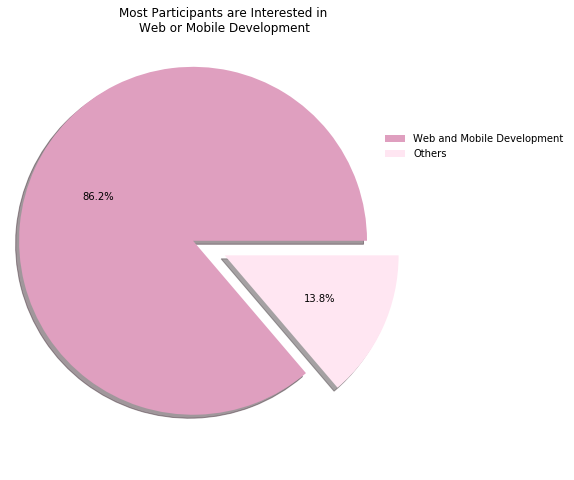

In [14]:
label = ["Web and Mobile Development", "Others"]

ax = representative_data.plot.pie(figsize = (12,8), autopct = "%.1f%%", explode = (0.2,0), 
                                  colors = ["#df9fbf", "#ffe6f2"], shadow = True, labels = None)
plt.title("Most Participants are Interested in \nWeb or Mobile Development")
ax.legend(label,frameon=False, bbox_to_anchor=(1.3,0.8))
ax.set_ylabel("")


plt.savefig("Most Interested Participants.png")
plt.show()

- From the graphical representation, we can see that 86.2% of data shows the relevancy towards our aim. Which means that most of the people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest.

In [15]:
fcc = fcc_coder[fcc_coder["JobRoleInterest"].notnull()].copy()

In [16]:
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
fcc.shape

(6992, 136)

- Now further we analyze that in which market we should advertise our product. The dataset provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the best countries to advertise in.
- We can start by examining the Country columns, which describes what country each participant lives in.

In [18]:
import re

In [19]:
fcc.columns[fcc.columns.str.contains("coun", flags = re.I)]

Index(['CountryCitizen', 'CountryLive'], dtype='object')

- Now we figure out how much money people are willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

In [20]:
fcc.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC',
       'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons',
       'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone',
       'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls',
       'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode',
       'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive',
       'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus',
       'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting',
       'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt',
       'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage',
       'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe',
       'HoursLearning', 'ID.x', 'ID.y', 'Income', 'Is

In [21]:
fcc['MonthsProgramming'].value_counts().sort_index()

0.0      235
1.0      767
2.0      669
3.0      637
4.0      367
        ... 
360.0      5
370.0      1
408.0      1
480.0      2
744.0      4
Name: MonthsProgramming, Length: 91, dtype: int64

- Let's start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the MoneyForLearning column into the MonthsProgramming column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the MonthsProgramming column.

In [22]:
fcc["MonthsProgramming"].replace(0,1, inplace = True)

In [23]:
fcc["MonthsProgramming"].isnull().sum()

359

In [24]:
fcc.loc[fcc["MonthsProgramming"].isnull(),['MonthsProgramming','MoneyForLearning']]

,MonthsProgramming,MoneyForLearning
13,NaN,NaN
29,NaN,300.0
34,NaN,NaN
37,NaN,NaN
100,NaN,NaN
...,...,...
17727,NaN,50.0
17862,NaN,NaN
18052,NaN,500.0
18129,NaN,0.0


In [25]:
fcc1 = fcc[fcc['MonthsProgramming'].notnull()].copy()

In [26]:
fcc1.shape

(6633, 136)

In [27]:
fcc1["CountryLive"].notnull().sum()

6519

In [28]:
fcc1 = fcc1[fcc1["CountryLive"].notnull()].copy()

In [29]:
fcc1.shape

(6519, 136)

In [30]:
fcc1["monthly_spend"] = fcc1['MoneyForLearning']/fcc1['MonthsProgramming']

In [31]:
fcc1.groupby("CountryLive")["monthly_spend"].mean().sort_values(ascending = False)

CountryLive
Yemen          10000.000000
Puerto Rico     4291.394558
Austria          936.208333
Spain            784.553084
Jamaica          747.037037
                   ...     
Aruba                   NaN
Bolivia                 NaN
Liberia                 NaN
Panama                  NaN
Qatar                   NaN
Name: monthly_spend, Length: 136, dtype: float64

In [32]:
fcc1['MoneyForLearning'].max()

200000.0

In [33]:
fcc1['MoneyForLearning'].min()

0.0

In [34]:
fcc1["CountryLive"].value_counts()

United States of America    2998
India                        503
United Kingdom               296
Canada                       252
Poland                       125
                            ... 
Panama                         1
Guadeloupe                     1
Rwanda                         1
Gibraltar                      1
Angola                         1
Name: CountryLive, Length: 136, dtype: int64

- We'll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this for two reasons:

     - These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.
     - Our courses are written in English, and English is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.

In [35]:
fcc_updated = fcc1[fcc1["CountryLive"].isin(['United States of America', 'India', 'United Kingdom', 'Canada'])]

In [36]:
fcc_updated.groupby("CountryLive")["monthly_spend"].mean().sort_values(ascending = False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: monthly_spend, dtype: float64

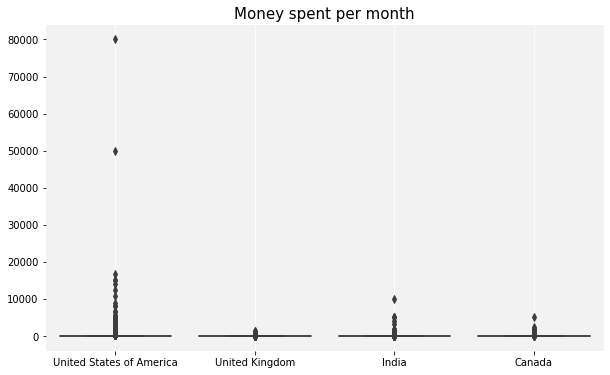

In [37]:
plt.figure(figsize = (10,6))
ax = sns.boxplot(x ="CountryLive", y = "monthly_spend", data = fcc_updated, 
                )
ax.set_xlabel("")
ax.set_ylabel("")
plt.title("Money spent per month", fontsize = 15)
ax.set_facecolor(color = "#f2f2f2")
plt.grid(linestyle = "-", linewidth = 0.8 , color = "white", axis = "x")
for value in ax.spines.values():
    value.set_visible(False)



plt.savefig("Money spent per month.png")    
plt.show()

- It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something off for the US, some people spend each month 50,000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over $20,000 per month.

- We can see a few extreme outliers for India, but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant. Now firstly we remove the outliers.

In [38]:
fcc_updated = fcc_updated[fcc_updated["monthly_spend"] < 20000]

In [39]:
fcc_updated.groupby("CountryLive")["monthly_spend"].mean().sort_values(ascending = False)

CountryLive
United States of America    183.800110
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: monthly_spend, dtype: float64

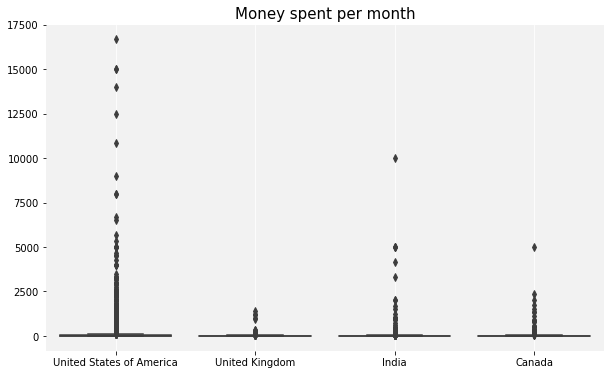

In [40]:
plt.figure(figsize = (10,6))
ax = sns.boxplot(x ="CountryLive", y = "monthly_spend", data = fcc_updated)
ax.set_xlabel("")
ax.set_ylabel("")
plt.title("Money spent per month", fontsize = 15)
ax.set_facecolor(color = "#f2f2f2")
plt.grid(linestyle = "-", linewidth = 0.8 , color = "white", axis = "x")
for value in ax.spines.values():
    value.set_visible(False)



plt.savefig("Money spent per month.png")    
plt.show()

In [41]:
fcc_updated[(fcc_updated["CountryLive"] =="India") & (fcc_updated["monthly_spend"] >= 2500)].index

Int64Index([1728, 1755, 7989, 8126, 13398, 15587], dtype='int64')

In [44]:
bol2 = (fcc_updated["CountryLive"] =="India") & (fcc_updated["monthly_spend"] >= 2500)
fcc_updated[bol2]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_spend
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


In [45]:
fcc_updated[bol2].index

Int64Index([1728, 1755, 7989, 8126, 13398, 15587], dtype='int64')

In [46]:
fcc_updated.drop(fcc_updated[bol2].index, inplace = True)

In [47]:
bol3 = (fcc_updated["CountryLive"] =="United States of America") & (fcc_updated["monthly_spend"] >= 6000)
fcc_updated[bol3]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_spend
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


In [48]:
bol4 = (fcc_updated["CountryLive"] =="United States of America") & (fcc_updated["monthly_spend"] >= 6000) & (fcc_updated["AttendedBootcamp"] == 0.0)
fcc_updated[bol4]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_spend
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000
17231,50.0,0.0,NaN,NaN,NaN,NaN,2.0,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000


In [49]:
fcc_updated.drop(fcc_updated[bol4].index, inplace = True)

In [50]:
bol3 = (fcc_updated["CountryLive"] =="United States of America") & (fcc_updated["monthly_spend"] >= 6000)
fcc_updated[bol3][["MonthsProgramming", "monthly_spend"]]

,MonthsProgramming,monthly_spend
718,1.0,8000.000000
1222,2.0,6500.000000
3184,1.0,9000.000000
6805,1.0,15000.000000
7505,3.0,6666.666667
9778,1.0,8000.000000


In [51]:
bol5 = (fcc_updated["CountryLive"] =="United States of America") & (fcc_updated["monthly_spend"] >= 6000) & (fcc_updated["MonthsProgramming"] <= 3)
fcc_updated[bol5]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_spend
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000


In [52]:
fcc_updated.drop(fcc_updated[bol5].index, inplace = True)

In [53]:
bol6 = (fcc_updated["CountryLive"] =="Canada") & (fcc_updated["monthly_spend"] > 4500)

In [54]:
fcc_updated[bol6][["MonthsProgramming", "monthly_spend"]]

,MonthsProgramming,monthly_spend
13659,2.0,5000.0


In [55]:
fcc_updated.drop(fcc_updated[bol6].index, inplace = True)

In [56]:
fcc_updated.groupby("CountryLive")["monthly_spend"].mean().sort_values(ascending = False)

CountryLive
United States of America    142.654608
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: monthly_spend, dtype: float64

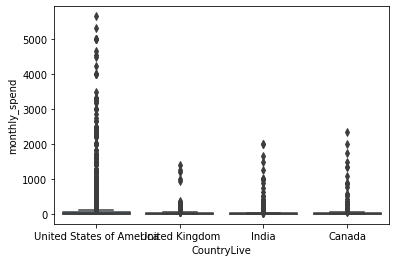

In [57]:
sns.boxplot(x = "CountryLive", y ="monthly_spend", data =  fcc_updated, whis = 1.5)

In [58]:
fcc_updated["CountryLive"].value_counts(normalize = True)

United States of America    0.749679
India                       0.117330
United Kingdom              0.071630
Canada                      0.061361
Name: CountryLive, dtype: float64

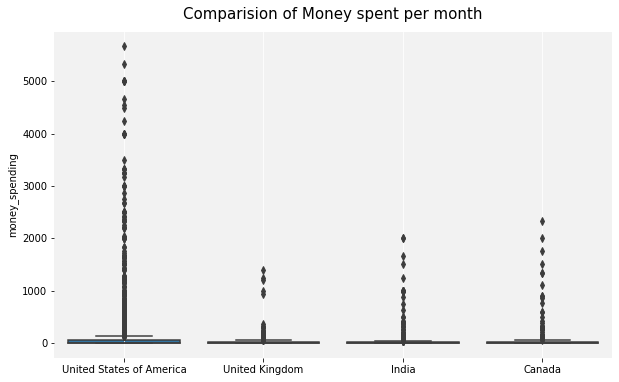

In [66]:
plt.figure(figsize = (10,6))
ax = sns.boxplot(x = "CountryLive", y ="monthly_spend", data =  fcc_updated)
ax.set_xlabel("")
ax.set_ylabel("money_spending")
plt.title("Comparision of Money spent per month", fontsize = 15, y = 1.02)
ax.set_facecolor(color = "#f2f2f2")
plt.grid(linestyle = "-", linewidth = 0.8 , color = "white", axis = "x")
for value in ax.spines.values():
    value.set_visible(False)



plt.savefig("Comparision of Money spent per month.png")
plt.show()

### CONCLUSION
   - From analysis we can see that one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month. We sell subscriptions at a price of **\$59** per month, and Canada seems to be the best second choice because people there are willing to pay roughly **$93** per month, compared to India and the United Kingdom. The data suggests strongly that we shouldn't advertise in the UK, 
   - At this point, it seems that we have several options:
        - Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
                - 80% for the US, 10% for India, 10% for Canada.
                - 50% for the US, 30% for India, 20% for Canada; etc.
        - Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
                - 70% for the US, and 30% for India.
                - 70% for the US, and 30% for Canada; etc.
                - Advertise only in the US.

   - The only solid conclusion we reached is that the US would be a good market to advertise in.
   - For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.
